In [36]:
from z_samTool import SAM2ImageProcessor
import cv2
import matplotlib.pyplot as plt
import numpy as np  
from PIL import Image


checkpoint = "D:/01-code/00-python/sam2_label/checkpoints/sam2.1_hiera_base_plus.pt"
model_cfg  = "D:/01-code/00-python/sam2_label/sam2/configs/sam2.1/sam2.1_hiera_b+.yaml"
image_path = r'D:\00-dataset\大肠\猪大肠\300_201205272026381338600949.jpg'
image_data = Image.open(image_path)
numpy_image = np.array(image_data)
processor = SAM2ImageProcessor(checkpoint, model_cfg)

图像尺寸: 800x1067
ratio value: 0.0525398313027179
invert Image


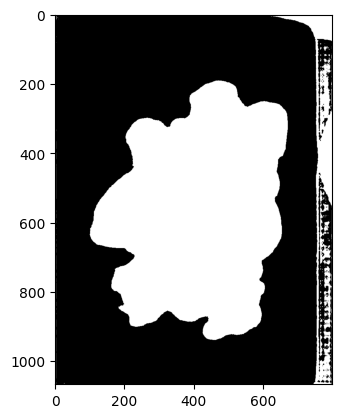

In [37]:
height, width = numpy_image.shape[:2]
print(f"图像尺寸: {width}x{height}")
image = processor.process_image_box(image_data, [0, 0, width, height])
plt.imshow(image, cmap='gray')

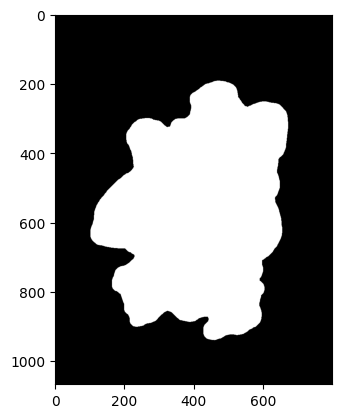

In [38]:
# 对图像进行开运算
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (image.shape[1]//25, image.shape[0]//25))  # 创建5x5椭圆结构元素
opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)  # 执行开运算

# 去除面积小于100的连通域
filter_area = image.shape[0] * image.shape[1] // 100
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(opened_image, connectivity=8)
for i in range(1, num_labels):
    if stats[i, cv2.CC_STAT_AREA] < filter_area:
        opened_image[labels == i] = 0

plt.imshow(opened_image, cmap='gray')


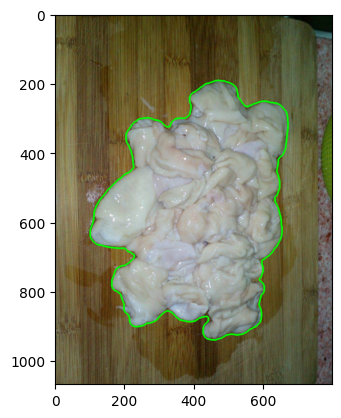

In [39]:
canny_border = cv2.Canny(opened_image, 100, 200)

# 获取Canny边缘检测结果中白色像素(255)的坐标
white_pixels = np.column_stack(np.where(canny_border == 255))

drawed_image = numpy_image.copy()
for i, (y, x) in enumerate(white_pixels):
    cv2.circle(drawed_image, (x, y), 2, (0, 255, 0), -1)

plt.imshow(drawed_image)